In [48]:
import pandas as pd
import numpy as np
import scanpy as sc
import celloracle as co

%matplotlib inline

import os

outs = '../results/NeMO/'
os.makedirs(outs, exist_ok=True)

FileExistsError: [Errno 17] File exists: '../results/NeMO/'

In [2]:
glio_rgc = '../data/Gliogenesis/Oracle.Perturbation.celloracle.oracle'

ocle_grgc = co.load_hdf5(glio_rgc)
ocle_grgc.adata

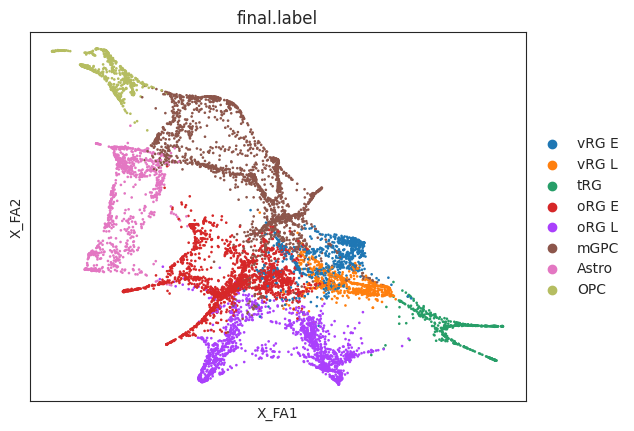

In [15]:
sc.pl.embedding(ocle_grgc.adata, basis='X_draw_graph_fa', color='final.label')

In [50]:
expr_grgc = {
    'counts': ocle_grgc.adata.layers['raw_count'].astype(int),
    'log1p': ocle_grgc.adata.layers['log1p']
}


expr_grgc = {k: pd.DataFrame(v, index=ocle_grgc.adata.obs_names, columns=ocle_grgc.adata.var_names) 
             for k, v in expr_grgc.items()}


anno_map_grgc = ocle_grgc.adata.obs[['final.label']]
anno_map_grgc[['FA1', 'FA2']] = ocle_grgc.adata.obsm['X_draw_graph_fa']


In [51]:
for expname, expdf in expr_grgc.items():
    print(f'{expname}: Saving...')
    expdf.to_csv(os.path.join(outs, f'RGCmat_and_Gliogenesis.expression.{expname}.csv'))
    print(f'{expname}: Done!')


print(f'Saving annotation and map')
anno_map_grgc.to_csv(os.path.join(outs, 'RGCmat_and_Gliogenesis.annotation_and_map.csv'))
print(f'Done')

counts: Saving...
counts: Done!
log1p: Saving...
log1p: Done!
Saving annotation and map
Done


In [42]:
neuro20 = '../data/NeuralPCW20/Oracle.Perturbation.celloracle.oracle'
ocle_neu = co.load_hdf5(neuro20)
ocle_neu.adata

AnnData object with n_obs × n_vars = 7437 × 2999
    obs: 'Cell.ID', 'Sample.ID', 'Age', 'Tissue.ID', 'Sample.Type', 'Assay', 'Batch', 'seurat_clusters', 'RNA.Counts', 'RNA.Features', 'Percent.MT', 'Percent.Ribo', 'Cell.Barcode', 'DF_pANN', 'DF_classification', 'DF_pANN_quantile', 'Spliced.Counts', 'Spliced.Features', 'Unspliced.Counts', 'Unspliced.Features', 'Ambiguous.Counts', 'Ambiguous.Features', 'Cluster.ID', 'Cluster.Name', 'Cluster.LongName', 'Cluster.In.GluN.trajectory', 'Cluster.Color', 'Cluster.Order', 'Cluster.N_cells', 'cell.type', 'UMAP_0', 'UMAP_1', 'velocity_pseudotime', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'CellType', 'Lineage', 'root_cells', 'end_points', 'nesc_id', 'nesc_id.is_rgc', 'rgcs_id', 'rgcs_id.is_rgc', 'new.annot', 'annot.qc.pass', 'log10.RNA.Counts', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_g

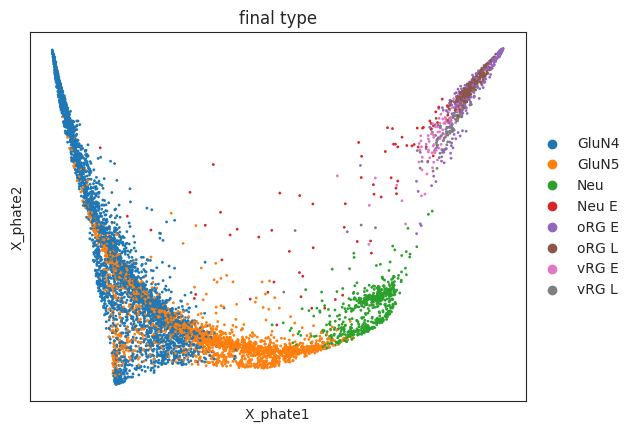

In [45]:
sc.pl.embedding(ocle_neu.adata, basis='X_phate', color='final.label')

In [52]:
expr_neu = {
    'counts': ocle_neu.adata.layers['raw_count'].astype(int),
    'log1p': ocle_neu.adata.layers['log1p']
}

expr_neu = {k: pd.DataFrame(v, index=ocle_neu.adata.obs_names, columns=ocle_neu.adata.var_names) 
            for k, v in expr_neu.items()}
    
anno_map_neu = ocle_neu.adata.obs[['final.label']]
anno_map_neu[['PHATE1', 'PHATE2']] = ocle_neu.adata.obsm['X_phate']


In [53]:
for expname, expdf in expr_neu.items():
    print(f'{expname}: Saving...')
    expdf.to_csv(os.path.join(outs, f'NeurogenesisPCW20.expression.{expname}.csv'))
    print(f'{expname}: Done!')


print(f'Saving annotation and map')
anno_map_neu.to_csv(os.path.join(outs, 'NeurogenesisPCW20.annotation_and_map.csv'))
print(f'Done')

counts: Saving...
counts: Done!
log1p: Saving...
log1p: Done!
Saving annotation and map
Done


In [66]:
nsc_reannot = sc.read_h5ad('/users/genomics/xoel/codebases/scvi/data/export_scvi_nesc.h5ad', backed=True)

final_annotation_table = pd.read_csv('/users/genomics/xoel/codebases/scvi/data/final_annotation_table.tsv', sep='\t', index_col=0)
nsc_reannot.obs['final_annotation'] = final_annotation_table['final_annotation'].loc[nsc_reannot.obs_names]

nsc_reannot

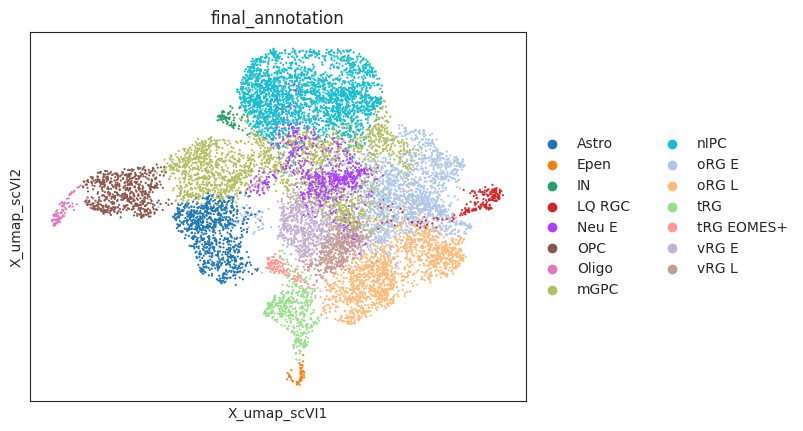

In [74]:
sc.pl.embedding(nsc_reannot, basis='X_umap_scVI', color='final_annotation')

In [72]:
expr_nsc = {
    'counts': nsc_reannot.layers['counts'].astype(int),
    'log1p': nsc_reannot.layers['lognorm']
}

expr_nsc = {k: pd.DataFrame(v, index=nsc_reannot.obs_names, columns=nsc_reannot.var_names) 
            for k, v in expr_nsc.items()}
    
anno_map_nsc = nsc_reannot.obs[['final_annotation']]
anno_map_nsc[['UMAP_SCVI1', 'UMAP_SCVI2']] = nsc_reannot.obsm['X_umap_scVI']


In [73]:
for expname, expdf in expr_nsc.items():
    print(f'{expname}: Saving...')
    expdf.to_csv(os.path.join(outs, f'Progenitors_reannotation.expression.{expname}.csv'))
    print(f'{expname}: Done!')


print(f'Saving annotation and map')
anno_map_nsc.to_csv(os.path.join(outs, 'Progenitors_reannotation.annotation_and_map.csv'))
print(f'Done')

counts: Saving...
counts: Done!
log1p: Saving...
log1p: Done!
Saving annotation and map
Done
